# Initialization

In [8]:
%load_ext autoreload
%autoreload 2
%pylab nbagg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/home/xcite/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['det', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
import sys
import os
import tigre
from scipy.signal import fftconvolve

sys.path.insert(0,'../xpecgen')

import xpecgen as xg

In [12]:
dose = 1

phan_map_hard =  ['air','water','Spongiosa_Bone_ICRP','G4_BONE_COMPACT_ICRU',
             'G4_BONE_CORTICAL_ICRP','C4_Vertebra_ICRP','D6_Vertebra_ICRP','G4_B-100_BONE']

phan_map_soft =  ['air','water','G4_ADIPOSE_TISSUE_ICRP','G4_BRAIN_ICRP',
             'G4_LUNG_ICRP','G4_MUSCLE_SKELETAL_ICRP','G4_TISSUE_SOFT_ICRP','pmma']

spectrum_files = ['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25']

dets = ['CWO','CuGOS_lowres']

phan_maps = [phan_map_hard]#,phan_map_soft]

In [13]:
angles = np.linspace(0,2*np.pi,90)

res = []

original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])


angles = np.linspace(0,2*pi,360)

geo = 'catphan_low_contrast_512'

phantom = xg.Catphan_515(os.path.join(xg.data_path,f'phantoms/{geo}.npy'))

for phan_map in phan_maps:
    for spectrum_file in spectrum_files:
        for det in dets:
            s = xg.Spectrum()

            energies = []
            fluence = []

            with open(os.path.join(xg.data_path, "MV_spectra", f'{spectrum_file}.txt')) as f:
                for line in f:
                    energies.append(float(line.split()[0]))
                    fluence.append(float(line.split()[1]))

            # Check if MV

            s.x = np.array(energies)*1000  # to keV
            s.y = np.array(fluence)

            spectrum = xg.Spectrum()

            spectrum.x = energies
            spectrum.y = fluence

            dump_files = os.path.join(
                xg.data_path, "Detectors", det, '*phsp.npy')
            energy_deposition_file = os.path.join(
                xg.data_path, "Detectors", det, 'EnergyDeposition.npy')

            kernel, kernels = xg.get_kernel(
                                    s, dump_files, energy_deposition_file)

            energy_deposition_file = os.path.join(
                xg.data_path, "Detectors", det, 'EnergyDeposition.npy')
            energies = s.x
            fluence = s.y
            deposition_efficiency_file = energy_deposition_file

            noise = xg.update_fluence(spectrum_file,dose)

            projs_xg = xg.return_projs(phantom.phantom,kernel,
                                       energies,fluence,angles,phantom.geomet,
                                       deposition_efficiency_file=deposition_efficiency_file
                                       ,phantom_mapping = phan_map,
                                       scaling=noise,
                                      dose=dose)

            img_xg = tigre.algorithms.FDK(
                np.transpose(np.array(projs_xg[0]),[0,2,1]), phantom.geomet,angles)

            res.append([[phan_map,spectrum_file,det],phantom.analyse_515(img_xg[5])])

(17,) (17,)
0.0006164371355334828
Scaled by  5510.024974918234
(17,) (17,)
0.0006164371355334828
Scaled by  5510.024974918234
(17,) (17,)
0.003986048237744313
Scaled by  5510.02497491823
(17,) (17,)
0.003986048237744313
Scaled by  5510.02497491823
(17,) (17,)
0.004306860990067286
Scaled by  5510.024974918232
(17,) (17,)
0.004306860990067286
Scaled by  5510.024974918232
(17,) (17,)
0.00047377257289330345
Scaled by  5510.024974918232
(17,) (17,)
0.00047377257289330345
Scaled by  5510.024974918232
(17,) (17,)
0.0022000206344120476
Scaled by  5510.024974918235
(17,) (17,)
0.0022000206344120476
Scaled by  5510.024974918235
(17,) (17,)
0.0003852795418135213
Scaled by  5510.024974918229
(17,) (17,)
0.0003852795418135213
Scaled by  5510.024974918229


In [30]:
res = [[[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'Al_spectrum_25', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [12.804704904556274, 13.970305025577545, 14.106233417987823, 13.109762966632843, 14.123426377773285, 10.531245172023773, 13.029561936855316, 6.869592517614365, 7.318830490112305, 73.98189902305603, 72.28959798812866, 71.28758430480957, 73.60627055168152, 71.8903124332428, 73.62591624259949, 70.06914019584656, 73.7168550491333, 73.95877242088318, 77.72484421730042, 76.6069233417511, 76.01644396781921, 75.3353476524353, 76.4035165309906, 74.37532544136047, 70.65939903259277, 75.44637322425842, 75.66155195236206, 39.3912136554718, 39.31560516357422, 37.62867748737335, 30.232396721839905, 28.042542934417725, 26.530468463897705, 27.423372864723206, 22.960175573825836, 35.495567321777344, 35.07121205329895, 34.79601442813873, 28.851541876792908], [1.1331717311415928, 1.2925947268856834, 1.2298973038310388, 1.2025193408575325, 1.4120166468210753, 0.8609937783120994, 0.973187387459695, 0.6457637566652772, inf, 6.181263633001589, 6.411037094169877, 6.976232584703022, 6.24013648169656, 5.643015542207729, 6.2947682555633175, 7.925074242260491, 7.374917178779072, inf, 6.347687774133028, 6.602684837485916, 6.65492328721168, 6.443974368165688, 7.8425198616424066, 7.506933032122086, 6.088226700902718, 9.244408071960775, inf, 3.552721924819107, 2.99540217632888, 3.365790616923021, 3.2119194301322174, 2.419945457133347, 2.1222700799055407, 2.5046991928305085, 2.265787572760104, 3.0517059794359302, 2.6036136309423257, 2.6768090637303894, 2.309966062395842])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'Al_spectrum_25', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [15.026077628135681, 13.993608951568604, 14.96116816997528, 16.512474417686462, 15.878991782665253, 13.372637331485748, 20.713837444782257, 16.57397598028183, 41.58385694026947, 75.28196573257446, 75.5103051662445, 74.83718991279602, 71.54400944709778, 73.52121472358704, 79.12565469741821, 71.5118944644928, 74.03507828712463, 25.16610324382782, 80.14310598373413, 80.53247928619385, 79.08090353012085, 77.07694172859192, 78.3033549785614, 78.87189984321594, 77.06224918365479, 67.06852912902832, 79.84972596168518, 40.103691816329956, 40.59793949127197, 37.71234452724457, 35.57138442993164, 28.232386708259583, 26.539945602416992, 24.943789839744568, 31.834131479263306, 37.0768666267395, 33.88232886791229, 36.15814447402954, 32.0268452167511], [0.9979654240928582, 1.0093946657901938, 1.0520654409284114, 1.2662655135228882, 0.8298094013602203, 1.066041713458599, 1.7368541653226754, 0.8328190290737945, inf, 4.968337677073984, 5.247692404107566, 4.927805397663121, 3.8982519793205395, 5.142882794392431, 5.567775534120223, 4.21477970097746, 4.0025312447705055, inf, 5.217349385165861, 5.599657954202854, 5.375325765257992, 4.419883855345869, 5.044437950308177, 6.916867573856733, 5.750953528721673, 3.962247233070921, inf, 2.70222905504292, 2.9430812870984737, 2.3007590748004034, 3.1647686444875287, 1.844739455774943, 1.804799932511849, 1.2712601382230042, 2.167300823632575, 2.35378477004988, 2.3166510443771706, 2.0274457314888856, 1.9755429940061955])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'C_spectrum_6', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [12.7872034907341, 13.50623220205307, 11.425632983446121, 12.48897984623909, 14.736630022525787, 14.896349608898163, 14.806890487670898, 6.335899233818054, 30.74195384979248, 73.85701537132263, 72.18692302703857, 71.91933989524841, 71.28515243530273, 70.48496007919312, 70.76723575592041, 71.74091339111328, 69.99459862709045, 65.05361199378967, 76.85490250587463, 75.41502714157104, 75.34102201461792, 74.05511736869812, 74.08764362335205, 73.0160653591156, 67.78205633163452, 76.64563059806824, 86.45346760749817, 37.64128386974335, 38.55192959308624, 35.76192259788513, 30.668911337852478, 26.538246870040894, 25.293979048728943, 29.446741938591003, 19.72837746143341, 34.731489419937134, 33.88066291809082, 34.48292016983032, 43.3493435382843], [1.1439362185761688, 1.2064790226586102, 0.8580783941293638, 1.100086985364918, 1.1599713197249537, 1.1202010081812006, 1.2871341571977208, 0.4590872587492631, inf, 6.878988757549223, 5.8546393183181245, 5.507655360095964, 5.88783517136489, 6.101554266547792, 6.137385494648954, 7.9282022431456864, 7.969775502197541, inf, 6.913133311813908, 6.416068521468013, 6.115535207578297, 7.10298557311449, 7.616969909179265, 6.630218998220287, 4.9816784305689135, 22.09106738589414, inf, 3.003745932678499, 3.218135694074776, 2.2885715171060284, 3.374966182526205, 2.2850644657773875, 2.1063489248800615, 3.047424176842731, 2.3968253529568067, 3.375924537814011, 2.731285697088667, 3.1345658410265362, 5.1945851769179185])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'C_spectrum_6', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [14.53779935836792, 14.110413193702698, 12.81488686800003, 13.34771066904068, 13.377644121646881, 17.13245064020157, 16.12275093793869, 21.39667719602585, 2.2911375388503075, 73.54736924171448, 73.02267551422119, 71.28440141677856, 72.79117703437805, 73.92929792404175, 71.38531804084778, 73.18140864372253, 64.70321416854858, 64.56701755523682, 79.49681282043457, 77.97417640686035, 78.6392867565155, 79.04946804046631, 76.25958323478699, 72.77329564094543, 76.24602317810059, 78.34600806236267, 89.48643803596497, 40.11055529117584, 40.65943360328674, 37.61726915836334, 30.555322766304016, 26.89562439918518, 26.60437822341919, 25.95527470111847, 31.236302852630615, 37.32497692108154, 34.79456305503845, 32.80419409275055, 41.490015387535095], [0.9543820548770897, 0.8887089103502832, 0.758710292440096, 1.0564026742588173, 0.8754179302097126, 1.1280902676251114, 1.258492494858058, 1.472292229281721, inf, 4.767935433646706, 4.593245241636834, 4.69471598035891, 4.446212272335056, 4.146109176706985, 4.812161136141843, 5.385569511076628, 5.913192671542992, inf, 4.938262715187928, 5.283110195922982, 5.332957129139225, 5.385550038318463, 5.285316115380288, 4.740474750990845, 4.579551802260126, 6.693228355078201, inf, 2.4888566333855064, 2.7239785893611774, 2.414169594751442, 1.9709025535988771, 1.6046859255139037, 1.6428330913509286, 1.8357730982532836, 2.28530270099865, 2.663364638862443, 2.1799713155799227, 2.439362614996825, 2.4454373542168932])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'Al_spectrum_6', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [12.773217260837555, 12.74958997964859, 14.029766619205475, 12.459457665681839, 11.210192739963531, 15.210680663585663, 12.566159665584564, 2.3884201422333717, 8.748144656419754, 73.83208274841309, 72.20229506492615, 71.73898816108704, 70.77443599700928, 68.45791339874268, 69.05859112739563, 67.1132504940033, 73.09874892234802, 50.217682123184204, 77.35025882720947, 76.13341808319092, 75.64550638198853, 74.09321665763855, 74.19882416725159, 75.2101480960846, 73.04736375808716, 71.46100997924805, 90.23569226264954, 38.427719473838806, 37.34153211116791, 33.77849757671356, 40.153664350509644, 28.360924124717712, 25.3464013338089, 27.137696743011475, 22.840729355812073, 35.900482535362244, 35.943761467933655, 36.98658049106598, 30.76307475566864], [1.1028832005193852, 1.1805690353079306, 1.3286134985167537, 1.0852666938616249, 0.9900215313265912, 1.4911837664630923, 1.433230490319928, 0.2728073202155191, inf, 6.813914817676165, 6.383286117899062, 6.085451127785784, 5.7373437846631665, 7.26182295876249, 6.172710504190271, 7.567252988262028, 8.41418191841028, inf, 6.855399863469758, 7.783927029264787, 6.8652580868321085, 6.334828500929564, 7.273179583048849, 7.446529738960207, 7.467282030206787, 7.5886104688243, inf, 3.1772053581878343, 3.271609595934981, 2.611227821773563, 4.241926020598028, 2.625791797266117, 2.1156548886978856, 1.880790431443491, 3.723631326704669, 2.980548980521257, 3.3722978999407633, 2.6883643282449348, 3.022461574778891])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'Al_spectrum_6', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [14.173126220703125, 14.440058171749115, 15.212219953536987, 15.357251465320587, 13.723209500312805, 13.330008089542389, 15.741939842700958, 4.46554534137249, 9.322281181812286, 75.01081824302673, 73.96395802497864, 74.66174364089966, 73.0654239654541, 75.36316514015198, 71.5190589427948, 69.83015537261963, 57.308584451675415, 47.577810287475586, 79.81387972831726, 78.12544703483582, 77.6996910572052, 77.30379104614258, 75.5361020565033, 78.08205485343933, 78.49848866462708, 76.28265619277954, 72.56913781166077, 38.215526938438416, 37.82501220703125, 36.409369111061096, 46.70397639274597, 25.933021306991577, 30.8586448431015, 26.3838529586792, 29.80917990207672, 34.951114654541016, 37.201809883117676, 37.79592514038086, 34.96886491775513], [0.9464186317582071, 0.9714971947926462, 1.0010182302022055, 1.0113805353002367, 0.7328847218970361, 1.074489966565625, 0.9063318381515201, 0.4894893941691737, inf, 5.110183329167272, 5.6141694015697645, 4.530918106126201, 4.544747372435394, 4.580930569701532, 5.253072862121316, 3.691317866970008, 4.278080970621958, inf, 5.245446915195714, 5.1944657095494255, 5.452125693655413, 4.7646932403991595, 4.934319185816192, 5.025938686138553, 5.201526451373263, 9.094146133838862, inf, 2.280209592527786, 2.598033971648522, 2.323214498077607, 3.4281388768447534, 1.6317014282609066, 1.8769633080927293, 2.0321355707689297, 2.189871599257247, 2.142599497399334, 2.259602890595143, 2.538926941416008, 1.6778444009438396])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'C_spectrum_25', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [12.647892534732819, 12.819623947143555, 13.653884828090668, 13.658873736858368, 13.061252236366272, 18.13882440328598, 11.78382784128189, 14.864251017570496, 12.703733146190643, 74.24655556678772, 72.1302330493927, 71.94543480873108, 71.4704155921936, 69.51165199279785, 72.55030274391174, 67.86087155342102, 73.60102534294128, 64.07009959220886, 78.09430360794067, 75.95780491828918, 76.05360746383667, 76.18896961212158, 75.98083019256592, 74.43397045135498, 77.0094633102417, 67.58689880371094, 76.76953077316284, 39.04501795768738, 39.36413526535034, 39.861029386520386, 28.477606177330017, 28.48632037639618, 27.723246812820435, 26.497730612754822, 31.253448128700256, 35.429468750953674, 35.57858765125275, 35.531044006347656, 29.585590958595276], [1.029781429802137, 1.0934632849940302, 1.2040350773411839, 1.1536699427279484, 1.1250629287597003, 1.4660091370637867, 1.0795654854397825, 1.2215203728115598, inf, 6.663900260309632, 6.1052502757351546, 6.338550362562134, 6.077557147568648, 6.763709322610292, 7.576170736600843, 4.479108140558093, 4.896340787747579, inf, 6.265099931670764, 6.511535511293549, 6.465073980388576, 6.124536114318735, 6.638393093390251, 6.9512559000811756, 4.831838083541246, 6.4836125452868485, inf, 2.959371758969248, 2.8523619420510737, 3.4790591851591053, 2.9586946233948908, 2.3563837854072975, 2.543333664443746, 1.9478243259668135, 2.741953084171038, 3.0232799313303578, 2.776280772761889, 3.100959098468613, 2.969567604148911])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'C_spectrum_25', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [13.950695097446442, 13.634327054023743, 12.172310054302216, 15.318547189235687, 14.812083542346954, 15.803210437297821, 16.141580045223236, 19.168871641159058, 17.311809957027435, 74.19272661209106, 73.05800318717957, 72.88894057273865, 74.35945272445679, 72.00287580490112, 74.45833683013916, 71.90133929252625, 73.52026104927063, 79.4979989528656, 80.04387021064758, 79.06577587127686, 78.01533341407776, 77.0176351070404, 81.0314953327179, 74.46287274360657, 77.33868956565857, 89.58502411842346, 102.6002049446106, 38.69631886482239, 37.79575228691101, 38.22537362575531, 38.9220267534256, 28.171813488006592, 29.233527183532715, 25.03008246421814, 31.410488486289978, 34.88064110279083, 34.85807776451111, 33.19139778614044, 31.811311841011047], [0.9258726477548203, 0.8357247360259988, 0.8372098944192274, 0.9387698063063462, 1.0102646015488466, 1.4395317395387643, 1.1485967976565328, 1.5171383469297706, inf, 4.712800182861801, 4.420765843704742, 4.939224506301922, 4.4441295512109615, 4.923679633498942, 5.856887187559524, 5.513108815935482, 7.686119412991153, inf, 5.53692741298913, 5.23863439126421, 5.418053130595204, 5.440219153027987, 5.1073356524498825, 4.141995668994958, 5.675277449913359, 6.225028916554614, inf, 2.557475221489511, 2.7549787037455826, 2.6123351396599035, 6.200295632475271, 1.7680692216878837, 1.7244167988796828, 1.2866067472138478, 1.8965993412163857, 2.2671267710139813, 2.176373519208776, 2.2556073100690384, 2.9184984711197726])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'W_spectrum_6', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [12.779419124126434, 12.4302476644516, 11.917239427566528, 12.823878228664398, 12.962447106838226, 11.76401674747467, 12.84235417842865, 2.496490254998207, 11.801957339048386, 72.35970497131348, 70.49526572227478, 69.26044821739197, 68.78777742385864, 68.65823268890381, 68.28535795211792, 67.38497614860535, 66.7005717754364, 55.23536801338196, 75.8685290813446, 74.05869364738464, 74.11420941352844, 73.02795648574829, 71.08905911445618, 70.79378366470337, 69.38678622245789, 69.17886734008789, 67.43375062942505, 38.55230212211609, 36.072611808776855, 35.84996163845062, 36.716845631599426, 27.32536792755127, 26.522615551948547, 23.810170590877533, 23.79508465528488, 35.32673120498657, 32.883939146995544, 31.774023175239563, 29.32983636856079], [1.336707498727443, 1.2667111542331226, 1.3878432293245333, 1.3844350822495894, 1.2545541671832448, 1.308344747077974, 1.310032943955376, 0.2993389635342954, inf, 7.05278403269886, 6.871377795096707, 7.958996560011027, 7.553440011310264, 7.431734333617028, 7.343131144955222, 9.50146715712082, 7.315694495822905, inf, 7.651901225777002, 7.018310121279282, 8.067820822058959, 7.618862854133343, 7.603555549047775, 6.443933785420109, 11.707539986443177, 6.293683337761667, inf, 3.804303998435518, 3.8138585578748314, 3.2853676346163008, 2.551098302877606, 2.827516663135058, 2.689699517650517, 2.2244911227692725, 3.1339628270981397, 3.765578121328803, 3.42973652343657, 3.3677342101972045, 4.57705829287566])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'W_spectrum_6', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [14.412708580493927, 13.384123146533966, 15.514950454235077, 13.867764174938202, 14.648254215717316, 14.444787800312042, 17.11517423391342, 15.75177013874054, 11.37644499540329, 74.73809123039246, 72.42095470428467, 72.77883887290955, 72.87487983703613, 73.19791316986084, 74.10225868225098, 64.1335129737854, 69.41037774085999, 72.28131294250488, 79.95273470878601, 78.00008654594421, 78.1175971031189, 78.78458499908447, 76.5984296798706, 78.67960333824158, 76.80923342704773, 72.09985852241516, 75.90405344963074, 38.43280375003815, 37.16982305049896, 40.99452495574951, 36.973267793655396, 26.86724364757538, 28.02618145942688, 23.220229148864746, 21.842455863952637, 36.313384771347046, 36.2526535987854, 34.415799379348755, 45.674872398376465], [1.103792819752445, 0.9566302483920573, 1.1341634537233114, 0.9675524117087784, 1.2241677007747882, 0.9741899357082918, 1.1958336394617415, 2.030762912469387, inf, 5.814483474135556, 5.293300064242303, 5.549651754254044, 5.837706474505351, 5.1029121827351815, 5.306641679160419, 3.457474724621889, 9.032280693987671, inf, 5.455347382188138, 5.590668675148718, 6.003838466968258, 6.090512930885052, 5.441552706275842, 5.487427837474553, 7.7943829399319915, 15.094558133786824, inf, 2.5606371484418062, 2.709313752436615, 3.276371089798681, 6.105607432392217, 1.7505358976644332, 1.9764470604124469, 1.7655460441332969, 1.4691589350346084, 2.871294014318818, 2.46053287445639, 2.5480718836217573, 3.8103218721833243])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'W_spectrum_25', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [13.12815397977829, 12.57774829864502, 11.273106932640076, 12.090452015399933, 11.466401070356369, 13.045541942119598, 7.981006056070328, 8.880357444286346, 19.003790616989136, 72.26892113685608, 70.52611708641052, 67.85557866096497, 69.89308595657349, 68.31543445587158, 64.98982906341553, 65.24314284324646, 56.22823238372803, 49.08933639526367, 75.31927227973938, 73.17766547203064, 71.50338292121887, 71.48963212966919, 70.53147554397583, 67.38667488098145, 62.64049410820007, 61.36694550514221, 77.58539319038391, 38.00075650215149, 36.06027960777283, 36.09459102153778, 43.9745306968689, 26.057690382003784, 24.52642023563385, 25.208431482315063, 18.158625066280365, 33.32870006561279, 32.65429139137268, 32.33437240123749, 24.489957094192505], [1.326153549849502, 1.2300219935799337, 1.1659254285461957, 1.1943190352498008, 1.37447849702442, 1.1977457662798245, 0.8010135685744022, 0.8550402213212149, inf, 7.649490585574327, 7.351180962197048, 6.482408893552299, 7.235114488750684, 7.692768139472749, 7.394991010609261, 5.939354128365241, 7.90422320460315, inf, 7.37917347819392, 7.128681178434291, 7.033131906354086, 6.918396285293063, 8.58024817522155, 8.472458958656091, 5.49357889813822, 10.85381680423383, inf, 3.783315017885649, 3.5054175463442045, 3.510154572893691, 3.9970645468640473, 2.425442319987198, 2.452706663344411, 2.155334861642974, 2.7054628515822317, 3.2839161831740307, 3.474046742813107, 3.1897628780869427, 2.43127198620935])], [[['air', 'water', 'Spongiosa_Bone_ICRP', 'G4_BONE_COMPACT_ICRU', 'G4_BONE_CORTICAL_ICRP', 'C4_Vertebra_ICRP', 'D6_Vertebra_ICRP', 'G4_B-100_BONE'], 'W_spectrum_25', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [14.805862307548523, 15.390412509441376, 13.43381255865097, 15.478673577308655, 12.510767579078674, 17.03476905822754, 9.88585650920868, 15.864162147045135, 26.796075701713562, 72.88064360618591, 68.86036992073059, 71.63195610046387, 70.93861699104309, 71.36724591255188, 70.12629508972168, 75.07961392402649, 58.983296155929565, 53.915345668792725, 79.1094958782196, 76.00281834602356, 75.70415139198303, 75.78301429748535, 73.8605260848999, 77.27081179618835, 77.0075798034668, 70.09919881820679, 71.21475338935852, 37.44380474090576, 37.575238943099976, 37.65997588634491, 37.38120794296265, 26.028797030448914, 27.908161282539368, 25.26264488697052, 29.669564962387085, 34.308308362960815, 34.92292761802673, 34.44117307662964, 37.06578314304352], [1.0868084900708608, 0.9304203702178995, 0.9064682697316736, 1.0138447797899508, 0.8967033713253784, 1.2722344923267943, 0.6040503094974369, 0.8658370148253131, inf, 5.056294681040737, 4.696453715680973, 5.003402537480812, 5.019501554865249, 4.672689040216297, 4.16630504117521, 8.061663796095587, 5.371830994118681, inf, 5.634293554131063, 5.732427551539757, 5.942556645736482, 5.88658717044894, 4.1805041471553075, 5.022334546110084, 5.633169410183334, 5.700266102104934, inf, 2.344307704125447, 2.174199652452877, 2.5575657066658515, 4.401827416264339, 1.6814245367814258, 1.8319519830380575, 1.5577341352686378, 3.425405999355605, 2.16496720129609, 2.309918012131607, 2.0384444869831277, 2.4984309665598827])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'Al_spectrum_25', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [2.5684386491775513, 3.511001542210579, 2.31819748878479, 1.3533937744796276, 0.8119247853755951, 3.971349447965622, 5.758490413427353, 0.10250280611217022, 11.819656938314438, 5.657043308019638, 5.362838506698608, 7.015971094369888, 5.148469656705856, 5.48313669860363, 7.083158940076828, 4.051132872700691, 5.503436550498009, 5.4719045758247375, 5.751677602529526, 5.252775549888611, 6.475137919187546, 5.30334860086441, 2.6981260627508163, 1.369110494852066, 4.87513542175293, 5.008888244628906, 22.11466133594513, 4.202661290764809, 3.805101290345192, 4.647305607795715, 4.85583208501339, 3.7336058914661407, 1.8658095970749855, 0.4785759374499321, 3.7856604903936386, 13.989223539829254, 13.258570432662964, 13.503468036651611, 11.29186525940895], [0.21880292229702014, 0.32137496604349236, 0.23189994237838543, 0.1135568963526497, 0.07502735425937647, 0.3215416621044564, 0.5208102784011623, 0.00923855018940786, inf, 0.5155021633808909, 0.4457346684904195, 0.6694352145178827, 0.4571198367146389, 0.5617775030933488, 0.5570046549051942, 0.3252270463517629, 0.8413085088962001, inf, 0.5482102960706194, 0.5198440466562232, 0.6044641836538107, 0.4307386052808055, 0.23607305431801756, 0.1326158472212497, 0.5856784013361125, 0.5565087149813319, inf, 0.3512138215373125, 0.2981162158647803, 0.37862946118244584, 0.3787067244392188, 0.3420843730482465, 0.1748841156889523, 0.059178079081936695, 0.5042642347314981, 1.142160134792366, 1.316120178366856, 1.0632910771540607, 1.2771020253908711])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'Al_spectrum_25', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [1.7636653035879135, 1.9327329471707344, 1.3003035448491573, 0.4953368566930294, 1.1274978518486023, 3.5377301275730133, 1.6719093546271324, 1.595575362443924, 17.07446128129959, 6.851854920387268, 5.709337443113327, 7.080559432506561, 10.105230659246445, 5.910562351346016, 6.970112770795822, 1.716085895895958, 1.2743860483169556, 15.900850296020508, 5.962933972477913, 6.458242237567902, 9.14340689778328, 3.5642899572849274, 8.535122126340866, 9.975537657737732, 8.870889991521835, 9.016723930835724, 15.375034511089325, 4.605245962738991, 5.890213698148727, 5.564404651522636, 7.422797381877899, 3.415781632065773, 1.0178372263908386, 0.678839348256588, 4.783054813742638, 12.496551871299744, 14.68757838010788, 13.503481447696686, 11.204174906015396], [0.12231377133380457, 0.13585424053518663, 0.07915690907504887, 0.03434050200200262, 0.08072667942536121, 0.27850887452518536, 0.13586588976124042, 0.12294515416657859, inf, 0.4653686595126464, 0.370880200015706, 0.5355887276684568, 0.707002663526039, 0.4040071497515227, 0.48210712661155275, 0.11020627244015292, 0.07513202054690503, inf, 0.39089578674367476, 0.4694365404680832, 0.6714471522483565, 0.26462530507143767, 0.5329021337407946, 0.6094686961247283, 0.5703398873766846, 0.5866959622570848, inf, 0.2949984358887851, 0.43100610048774973, 0.38116914512130134, 0.8009261925598596, 0.2089490609269369, 0.07380489783124441, 0.04811997789473228, 0.31731757749352874, 0.8957091472439501, 1.0879810231492482, 1.083391697223199, 1.1871006692555575])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'C_spectrum_6', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [2.9978811740875244, 3.3637236803770065, 3.6286145448684692, 2.86127757281065, 3.9214789867401123, 2.7465147897601128, 4.758326709270477, 1.7811845988035202, 11.595974862575531, 4.899889975786209, 5.0724126398563385, 4.908376187086105, 4.615993797779083, 5.512667074799538, 6.951120495796204, 5.453851819038391, 4.9171291291713715, 0.7563024293631315, 4.42192405462265, 4.5759886503219604, 6.009775400161743, 4.625535756349564, 4.542344436049461, 5.392898619174957, 4.834694042801857, 11.126045137643814, 9.175225347280502, 3.966502845287323, 4.0566615760326385, 1.5275303274393082, 6.22880794107914, 2.547941356897354, 0.08566809119656682, 1.1793049052357674, 4.679958149790764, 13.54895830154419, 13.00157904624939, 13.80077451467514, 8.528660982847214], [0.27586512978436784, 0.3224632202709947, 0.3425723011869267, 0.23857191824883286, 0.36469036898480156, 0.1884719926462128, 0.4263775274694429, 0.18302207494578707, inf, 0.4390851533590405, 0.4342782066075679, 0.45220857592074254, 0.40227775766881574, 0.6166364550247818, 0.6147184469181143, 0.47387890626797374, 1.2882558259289123, inf, 0.40037366863582324, 0.5003431395954587, 0.5489102655543816, 0.4593992148643037, 0.4327294114761659, 0.5658807544196771, 0.41621322382204395, 1.4371838449817365, inf, 0.3422977652465919, 0.3500778858909125, 0.14605614051596827, 0.8726124572864844, 0.24749034192948693, 0.007910550118456636, 0.11721341210613599, 0.44840588919011537, 1.1948350940074766, 1.12719624890237, 1.1254055121348365, 0.9756713511127548])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'C_spectrum_6', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [1.1782767251133919, 1.7223088070750237, 1.337748672813177, 2.9045624658465385, 2.7395302429795265, 2.603033557534218, 3.528917208313942, 6.4298175275325775, 4.820467531681061, 6.147401034832001, 6.173504143953323, 5.298129841685295, 6.981316953897476, 0.18236131872981787, 8.468828350305557, 2.6490602642297745, 5.036323517560959, 1.002257689833641, 6.041842699050903, 5.765778198838234, 5.698226019740105, 5.945974588394165, 7.758849114179611, 4.358789324760437, 3.074830584228039, 5.498097091913223, 12.64704018831253, 3.8731440901756287, 3.6422573029994965, 0.16607173020020127, 4.811893403530121, 3.1150013208389282, 1.257883943617344, 1.226744893938303, 0.8746400475502014, 13.355255126953125, 13.988660275936127, 11.131250858306885, 16.652990877628326], [0.08265157380936233, 0.12088235929046176, 0.08814899660256588, 0.19076105471038637, 0.17728044614194421, 0.1877525308222067, 0.26570156281836893, 0.6607370250474242, inf, 0.4117537851381579, 0.3987579356783169, 0.37877123721322525, 0.4776752576697305, 0.013267271052234892, 0.6793099768316907, 0.12457425114901874, 0.4246406487456015, inf, 0.45337439102513355, 0.42759603701569715, 0.3603573827117455, 0.3809461251676896, 0.6093195521102498, 0.3220064307367693, 0.18045063123900748, 0.3723487963566543, inf, 0.26155398067366054, 0.21251679333633736, 0.011501399819698235, 0.4328530449121989, 0.2094093641630542, 0.07685338271904561, 0.09562337946911544, 0.07593639908424717, 0.8686868091588326, 0.8823705154191863, 0.8041861692942192, 0.9582130007793248])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'Al_spectrum_6', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [2.2348036989569664, 2.0460691303014755, 1.6860699281096458, 1.72480009496212, 3.2268352806568146, 1.9841546192765236, 3.442242741584778, 0.4493721295148134, 3.2105106860399246, 5.397282913327217, 4.75454181432724, 4.667047411203384, 5.515960231423378, 4.631773382425308, 3.1078172847628593, 7.807514071464539, 9.797357022762299, 17.607738077640533, 5.384080484509468, 5.819451808929443, 5.6787025183439255, 6.567144393920898, 6.2306370586156845, 2.67759095877409, 4.68609519302845, 7.727894186973572, 17.491763830184937, 5.414595827460289, 4.893942549824715, 2.8919121250510216, 10.162769258022308, 1.1513961479067802, 3.00800409168005, 3.1606007367372513, 2.9758261516690254, 13.536480069160461, 14.424829185009003, 14.276480674743652, 14.278484880924225], [0.21546801854168618, 0.161629338980735, 0.14900720313800758, 0.15360031243863528, 0.3432145931001113, 0.19595497424911293, 0.31614382563245375, 0.04964410923179188, inf, 0.5371587159705344, 0.451299686708325, 0.42222891547982455, 0.5631346111293534, 0.4996537885418968, 0.319696273793944, 0.7099630717374318, 1.6451159837845406, inf, 0.5250868190556107, 0.5925339189344547, 0.5181099235136826, 0.5620457711370322, 0.5210814780337562, 0.2426273588637137, 0.4335967859377813, 0.5510559499628995, inf, 0.4656197052378819, 0.37448931357308013, 0.26310485109116, 1.2051671054219755, 0.10400052915194902, 0.2616038577188996, 0.2747027967104752, 0.28831031251273276, 1.2237160703634624, 1.1492378687128537, 1.2579244055542356, 1.4375720898676554])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'Al_spectrum_6', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [1.4023460447788239, 2.044333331286907, 1.2299885973334312, 1.62276029586792, 2.788679488003254, 1.1857407167553902, 0.5000141449272633, 0.08985805907286704, 9.945884346961975, 6.212668865919113, 8.25473815202713, 5.519334226846695, 7.21006840467453, 4.53866682946682, 4.925701022148132, 5.147266760468483, 4.161485284566879, 23.01962375640869, 7.017726451158524, 6.562171131372452, 6.7461952567100525, 9.417375922203064, 9.534116834402084, 8.172132819890976, 0.7159191183745861, 2.6999153196811676, 13.140566647052765, 4.722105339169502, 5.2951879799366, 5.502784624695778, 4.677588865160942, 3.630233183503151, 2.1251345053315163, 2.892708033323288, 4.8827484250068665, 12.963968515396118, 13.275477290153503, 10.359254479408264, 9.401842951774597], [0.09898022797692382, 0.14133455068062062, 0.08817897230053436, 0.10823143297612285, 0.19323632637112734, 0.0834630644824449, 0.031132730316016596, 0.006478088984499377, inf, 0.43084995830329204, 0.5956452269460929, 0.41000002494411625, 0.5140654141198979, 0.31516285279442463, 0.26930780943785887, 0.26730180770816, 0.21082894851640446, inf, 0.48262846164549045, 0.47687039294213246, 0.5144401725608875, 0.6974270652180381, 0.8087652567816933, 0.8047575542565826, 0.04947662199608177, 0.2978886520555696, inf, 0.291900544225877, 0.4169465190543097, 0.3789013689535408, 0.3824139769543713, 0.24734750535663128, 0.15194136293299204, 0.1678585714568054, 0.35344252697649214, 0.8519451173148289, 0.9465943042053818, 0.7334164783112258, 0.7746261871409503])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'C_spectrum_25', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [3.3508408814668655, 3.201153874397278, 2.7357837185263634, 3.148936852812767, 4.4474538415670395, 1.6399705782532692, 3.0865751206874847, 2.196652628481388, 11.663953214883804, 4.806646704673767, 4.922168329358101, 4.6386610716581345, 3.811138868331909, 4.366195201873779, 4.664119333028793, 7.702723890542984, 5.1065802574157715, 11.697520315647125, 5.164084210991859, 4.9362663179636, 5.115463212132454, 5.002054944634438, 3.754863888025284, 3.0280567705631256, 7.197029888629913, 5.928210914134979, 6.9088660180568695, 3.525635227560997, 1.3796650804579258, 3.8787025958299637, 0.15604678774252534, 2.993299625813961, 4.021041467785835, 2.317480556666851, 9.113465249538422, 12.254676967859268, 14.19360488653183, 12.398608773946762, 6.905237585306168], [0.29352385701951345, 0.29898954009440676, 0.27301196862066773, 0.2925068253414785, 0.38541666446537814, 0.1614642000516828, 0.3345405196201764, 0.2598646780938541, inf, 0.41629369946551087, 0.4087566486879749, 0.45147318476671905, 0.38854824198047033, 0.38590182446242216, 0.41078263466713705, 0.6056410446178192, 0.47450634316442497, inf, 0.46471918160333814, 0.42135824356863655, 0.4720538974105174, 0.5065044823361813, 0.322756441720149, 0.2578742460379047, 0.7146668078653933, 1.0191182842968818, inf, 0.2852514091251251, 0.11403070494643776, 0.3607969689110748, 0.008548286535558149, 0.2524018988319999, 0.3445529176140608, 0.2233718106566268, 1.1032755209159508, 0.9079412045806482, 1.2171558604341286, 1.1653003936553106, 0.7180674195976761])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'C_spectrum_25', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [1.2056190520524979, 0.7212317548692226, 2.0365187898278236, 2.8878768905997276, 2.4077709764242172, 3.0535664409399033, 1.689901016652584, 0.5962869618088007, 21.382972598075867, 6.806565076112747, 6.308270990848541, 6.934249401092529, 5.656862258911133, 9.3563012778759, 10.632816702127457, 10.55850088596344, 2.6321256533265114, 8.50987583398819, 6.631872057914734, 5.999773368239403, 6.337454915046692, 7.08225816488266, 5.587738007307053, 7.114190608263016, 8.247697353363037, 9.127023071050644, 5.406283214688301, 4.96702715754509, 6.402537226676941, 7.805194705724716, 1.9755931571125984, 3.473120555281639, 2.0739495754241943, 0.3072712803259492, 0.009759965178091079, 14.635178446769714, 11.124205589294434, 15.747182071208954, 4.9080174416303635], [0.08332618945563652, 0.04482665322877095, 0.13568268852415602, 0.18323330094719947, 0.19700379257338976, 0.23129068973738295, 0.0862664480620229, 0.08316409207047527, inf, 0.44798976235213744, 0.4725546642138077, 0.44120770567687484, 0.3766773401086371, 0.7397368754597419, 0.8853442082243357, 0.5364615389668984, 0.14978761442402783, inf, 0.44288962955275474, 0.38306691630117246, 0.4267595343736662, 0.548373798524277, 0.37183499413424903, 0.4321715629726781, 0.5138368017237888, 0.7775174268214249, inf, 0.31259130611683644, 0.42528542300245253, 0.6244650870616755, 0.2074280342713221, 0.2380609861609798, 0.12956126188096526, 0.021439031771865204, 0.0006296801661947799, 0.9914932360118243, 0.776570658595853, 1.200512376686313, 0.28499351686425206])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'W_spectrum_6', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [2.491714060306549, 2.399981766939163, 2.581420913338661, 1.33243752643466, 0.6142142694443464, 1.9632929936051369, 2.0970169454813004, 8.847925066947937, 6.211405619978905, 5.1268938928842545, 5.027281865477562, 4.447349533438683, 4.987446218729019, 4.432537779211998, 6.885866820812225, 9.31679829955101, 4.243506491184235, 12.020117044448853, 5.025393515825272, 5.35033755004406, 5.45177236199379, 5.476227775216103, 4.396413266658783, 4.930610209703445, 5.233032628893852, 2.4109648540616035, 10.774270445108414, 4.345463961362839, 4.184840992093086, 1.1773550882935524, 4.9662575125694275, 2.0280348137021065, 2.0835576578974724, 3.3863522112369537, 0.6817459594458342, 13.663706183433533, 11.789440363645554, 13.19112777709961, 12.699471414089203], [0.288249019120258, 0.2845114718900982, 0.32138864375463855, 0.13953367044762077, 0.06835959833427653, 0.23474020698447617, 0.2550685270620454, 0.8374907331463084, inf, 0.5615323685438125, 0.5593572283594389, 0.5092787649100545, 0.5677296038726297, 0.43213646206736045, 1.0715844459554782, 1.1565568326554017, 0.3611351788137246, inf, 0.5364120400619398, 0.5585461951563712, 0.6114760397902488, 0.5196700906925088, 0.5533543027258943, 0.6198086202800576, 0.489987951221258, 0.24911718059473242, inf, 0.442448119661517, 0.4131850721509693, 0.13250369773400508, 0.7978189517110666, 0.21863728624751014, 0.23981340401465628, 0.37195678571121005, 0.13482692729966983, 1.4452581404296792, 1.2646258027229877, 1.427809115653114, 2.1693678465481403])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'W_spectrum_6', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [1.1264093220233917, 1.4502632431685925, 2.8253478929400444, 0.767082255333662, 1.98576208204031, 0.1753882272168994, 3.853563591837883, 17.92544573545456, 5.670195072889328, 6.214301660656929, 6.559470295906067, 7.263793796300888, 6.21584951877594, 5.483265966176987, 3.007672168314457, 5.679978057742119, 4.162532836198807, 10.802197456359863, 5.660641193389893, 7.489826530218124, 5.168335139751434, 6.278044730424881, 6.686755269765854, 5.891020968556404, 5.045320838689804, 14.1774982213974, 0.6917507387697697, 5.073590204119682, 3.7013716995716095, 4.420503601431847, 15.602931380271912, 2.286858856678009, 2.8892626985907555, 3.0067455023527145, 10.341513901948929, 12.687873840332031, 13.328473269939423, 10.725308209657669, 6.7145951092243195], [0.09014016883410658, 0.1219288126097525, 0.23053446896880744, 0.07003026989970071, 0.1521622297058446, 0.014083816853993463, 0.4765065948932706, 1.3348599739984934, inf, 0.4946491213144356, 0.557507325523434, 0.6044918726577914, 0.41238403289605297, 0.4975300103016921, 0.22914201032691214, 0.5058508954143338, 0.5074023716703885, inf, 0.44996256501285375, 0.5701705660668275, 0.4410306119870114, 0.4839176795660974, 0.5414794003053769, 0.41613616982220303, 0.40625166475854485, 1.129478170213519, inf, 0.37800959961277675, 0.2950781808659593, 0.3060235676712808, 1.1853489195788056, 0.1817096268517921, 0.21707697155584715, 0.22187282169322567, 1.1966637059700012, 0.9788903981822633, 1.0208164867240717, 0.6859875677451869, 0.911091360009204])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'W_spectrum_25', 'CWO'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [2.5170039385557175, 2.932179532945156, 2.3835061118006706, 2.57588941603899, 1.5684440732002258, 2.0165812224149704, 4.355081170797348, 1.7699018120765686, 0.13678808463737369, 4.779944568872452, 5.2776578813791275, 6.385946273803711, 3.964582458138466, 5.642754957079887, 6.140311434864998, 2.719617076218128, 1.6758743673563004, 0.5902327597141266, 4.812325164675713, 5.357519164681435, 5.246458947658539, 4.177810624241829, 5.280060321092606, 4.026810452342033, 0.7216545753180981, 3.4738674759864807, 16.60362333059311, 3.295859694480896, 4.445485398173332, 1.3397828675806522, 0.5595953203737736, 1.9779400900006294, 2.4872150272130966, 2.880096435546875, 0.497537013143301, 12.434057891368866, 13.58812302350998, 12.272090464830399, 14.487765729427338], [0.2840025770469167, 0.33571558574595095, 0.2511804548140378, 0.2716920537402449, 0.19001798927445368, 0.19005956954842648, 0.6026896778986155, 0.19545717486984845, inf, 0.4934190769312674, 0.5786200029166335, 0.642654158587145, 0.4442407988944619, 0.7264651819926189, 0.7449828217106331, 0.39211717289850206, 0.19173679026407803, inf, 0.5414927660751361, 0.555692147889434, 0.6890480420333496, 0.42572790910013186, 0.6335992059563458, 0.4220875738600307, 0.07600199214572056, 0.31274051199664527, inf, 0.3628905743188726, 0.40922133656646514, 0.14405485323770437, 0.12611077763261655, 0.18365029958993911, 0.25528869638517243, 0.29351506998417887, 0.0598565906396912, 1.296721705182394, 1.345821930081284, 1.4677666204529916, 1.7869757268825115])], [[['air', 'water', 'G4_ADIPOSE_TISSUE_ICRP', 'G4_BRAIN_ICRP', 'G4_LUNG_ICRP', 'G4_MUSCLE_SKELETAL_ICRP', 'G4_TISSUE_SOFT_ICRP', 'pmma'], 'W_spectrum_25', 'CuGOS_lowres'], (array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]), [1.1044103652238846, 0.052980752661824226, 0.44221305288374424, 0.12551289983093739, 3.2897349447011948, 1.861814595758915, 3.595728427171707, 3.561735525727272, 3.5754509270191193, 5.9269387274980545, 6.831078231334686, 5.131014436483383, 5.071042105555534, 7.489732652902603, 6.749195605516434, 8.71918797492981, 7.858553528785706, 10.540896654129028, 6.192014366388321, 7.283444702625275, 5.888284742832184, 5.426844954490662, 6.740294396877289, 6.444177031517029, 1.7819756641983986, 2.98205129802227, 33.03835690021515, 4.346494376659393, 6.0514964163303375, 3.3761832863092422, 4.779614508152008, 3.5695865750312805, 3.3191148191690445, 2.688990533351898, 14.162318408489227, 13.561344146728516, 12.142010033130646, 11.366955190896988, 3.951770067214966], [0.08199338302124308, 0.0036219652899890237, 0.031880007395219755, 0.009561066574410124, 0.3138564935537564, 0.14453409749280102, 0.2741305649423265, 0.27206249350796685, inf, 0.43013855542260226, 0.5151158443102742, 0.376713506709571, 0.3347090417320104, 0.5411744996578248, 0.5002858060460612, 0.7395551760548369, 0.7342021133191576, inf, 0.42975086085203884, 0.5764940507105203, 0.42052079603008136, 0.39976552959661155, 0.4472268308974601, 0.4350995828894386, 0.09921852844994382, 0.2977033345689327, inf, 0.290998184662456, 0.3820525475868228, 0.23863508919297088, 0.27763170751852634, 0.22840104297011193, 0.2155520273519945, 0.16261540405407846, 1.0331762049689446, 0.9403587712724687, 0.8209125745985718, 0.8407834759231113, 0.2762691538262247])]]


In [6]:
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>


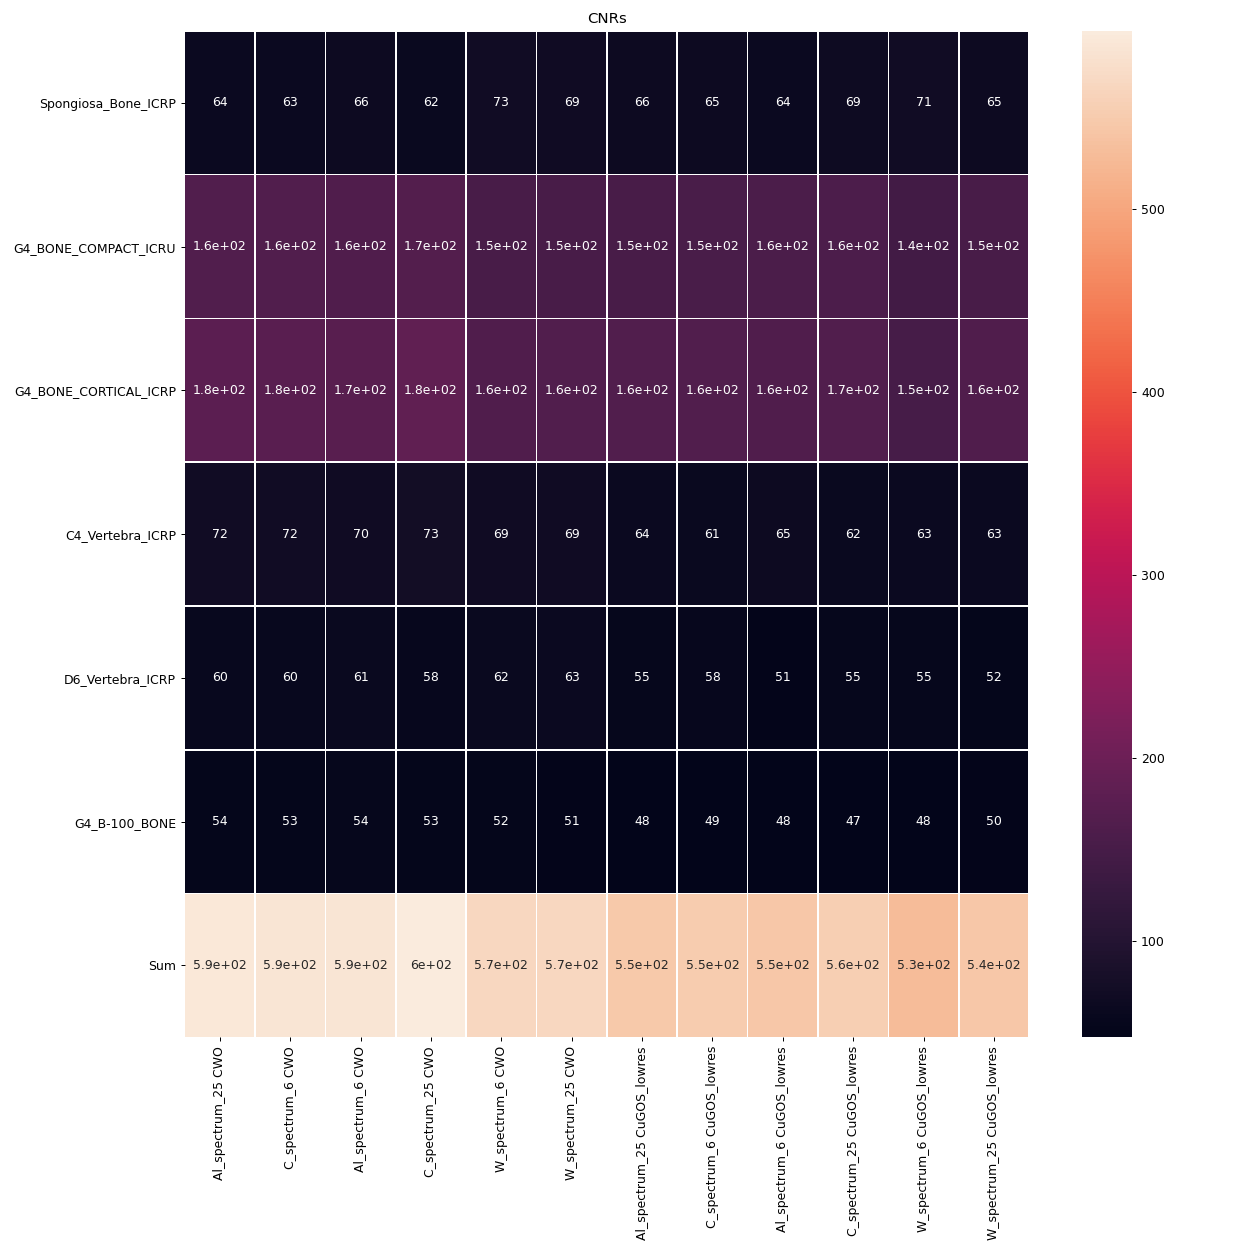

In [14]:
# def plot_cnr(res):

res_CWO = [res[ii] for ii in range(0,len(res),2)]
res_CuGOS = [res[ii] for ii in range(1,len(res),2)]

dat = []
index = []
column = []
    
for words, cnrs in res_CWO[:6]:
    
#     cnrs[-1][np.isfinite(cnrs[-1])] = 0
    dat.append(np.nansum(cnrs[-1][:8]))
    dat.append(np.nansum(cnrs[-1][9:17]))
    dat.append(np.nansum(cnrs[-1][18:26]))
    dat.append(np.nansum(cnrs[-1][27:31]))
    dat.append(np.nansum(cnrs[-1][31:35]))
    dat.append(np.nansum(cnrs[-1][35:38]))
    dat.append(np.sum(dat[-6:]))
    
    index.append(words[1] + ' ' + words[2])
    column.append(words[2])
             
for words, cnrs in res_CuGOS[:6]:
    
#     cnrs[-1][np.isfinite(cnrs[-1])] = 0
    dat.append(np.nansum(cnrs[-1][:8]))
    dat.append(np.nansum(cnrs[-1][9:17]))
    dat.append(np.nansum(cnrs[-1][18:26]))
    dat.append(np.nansum(cnrs[-1][27:31]))
    dat.append(np.nansum(cnrs[-1][31:35]))
    dat.append(np.nansum(cnrs[-1][35:38]))
    dat.append(np.sum(dat[-6:]))
    
    index.append(words[1] + ' ' +  words[2])
    column.append(words[2])
    
all_plot = pd.DataFrame(data= np.array(dat).reshape([7,len(dat)//7],order='F'),index=phan_map_hard[2:]+ ['Sum'],columns=index)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(all_plot, annot=True, linewidths=.5, ax=ax)
plt.title('CNRs')
plt.tight_layout()

In [61]:
plt.savefig('heatmap_10mGy_bone.png')

<IPython.core.display.Javascript object>


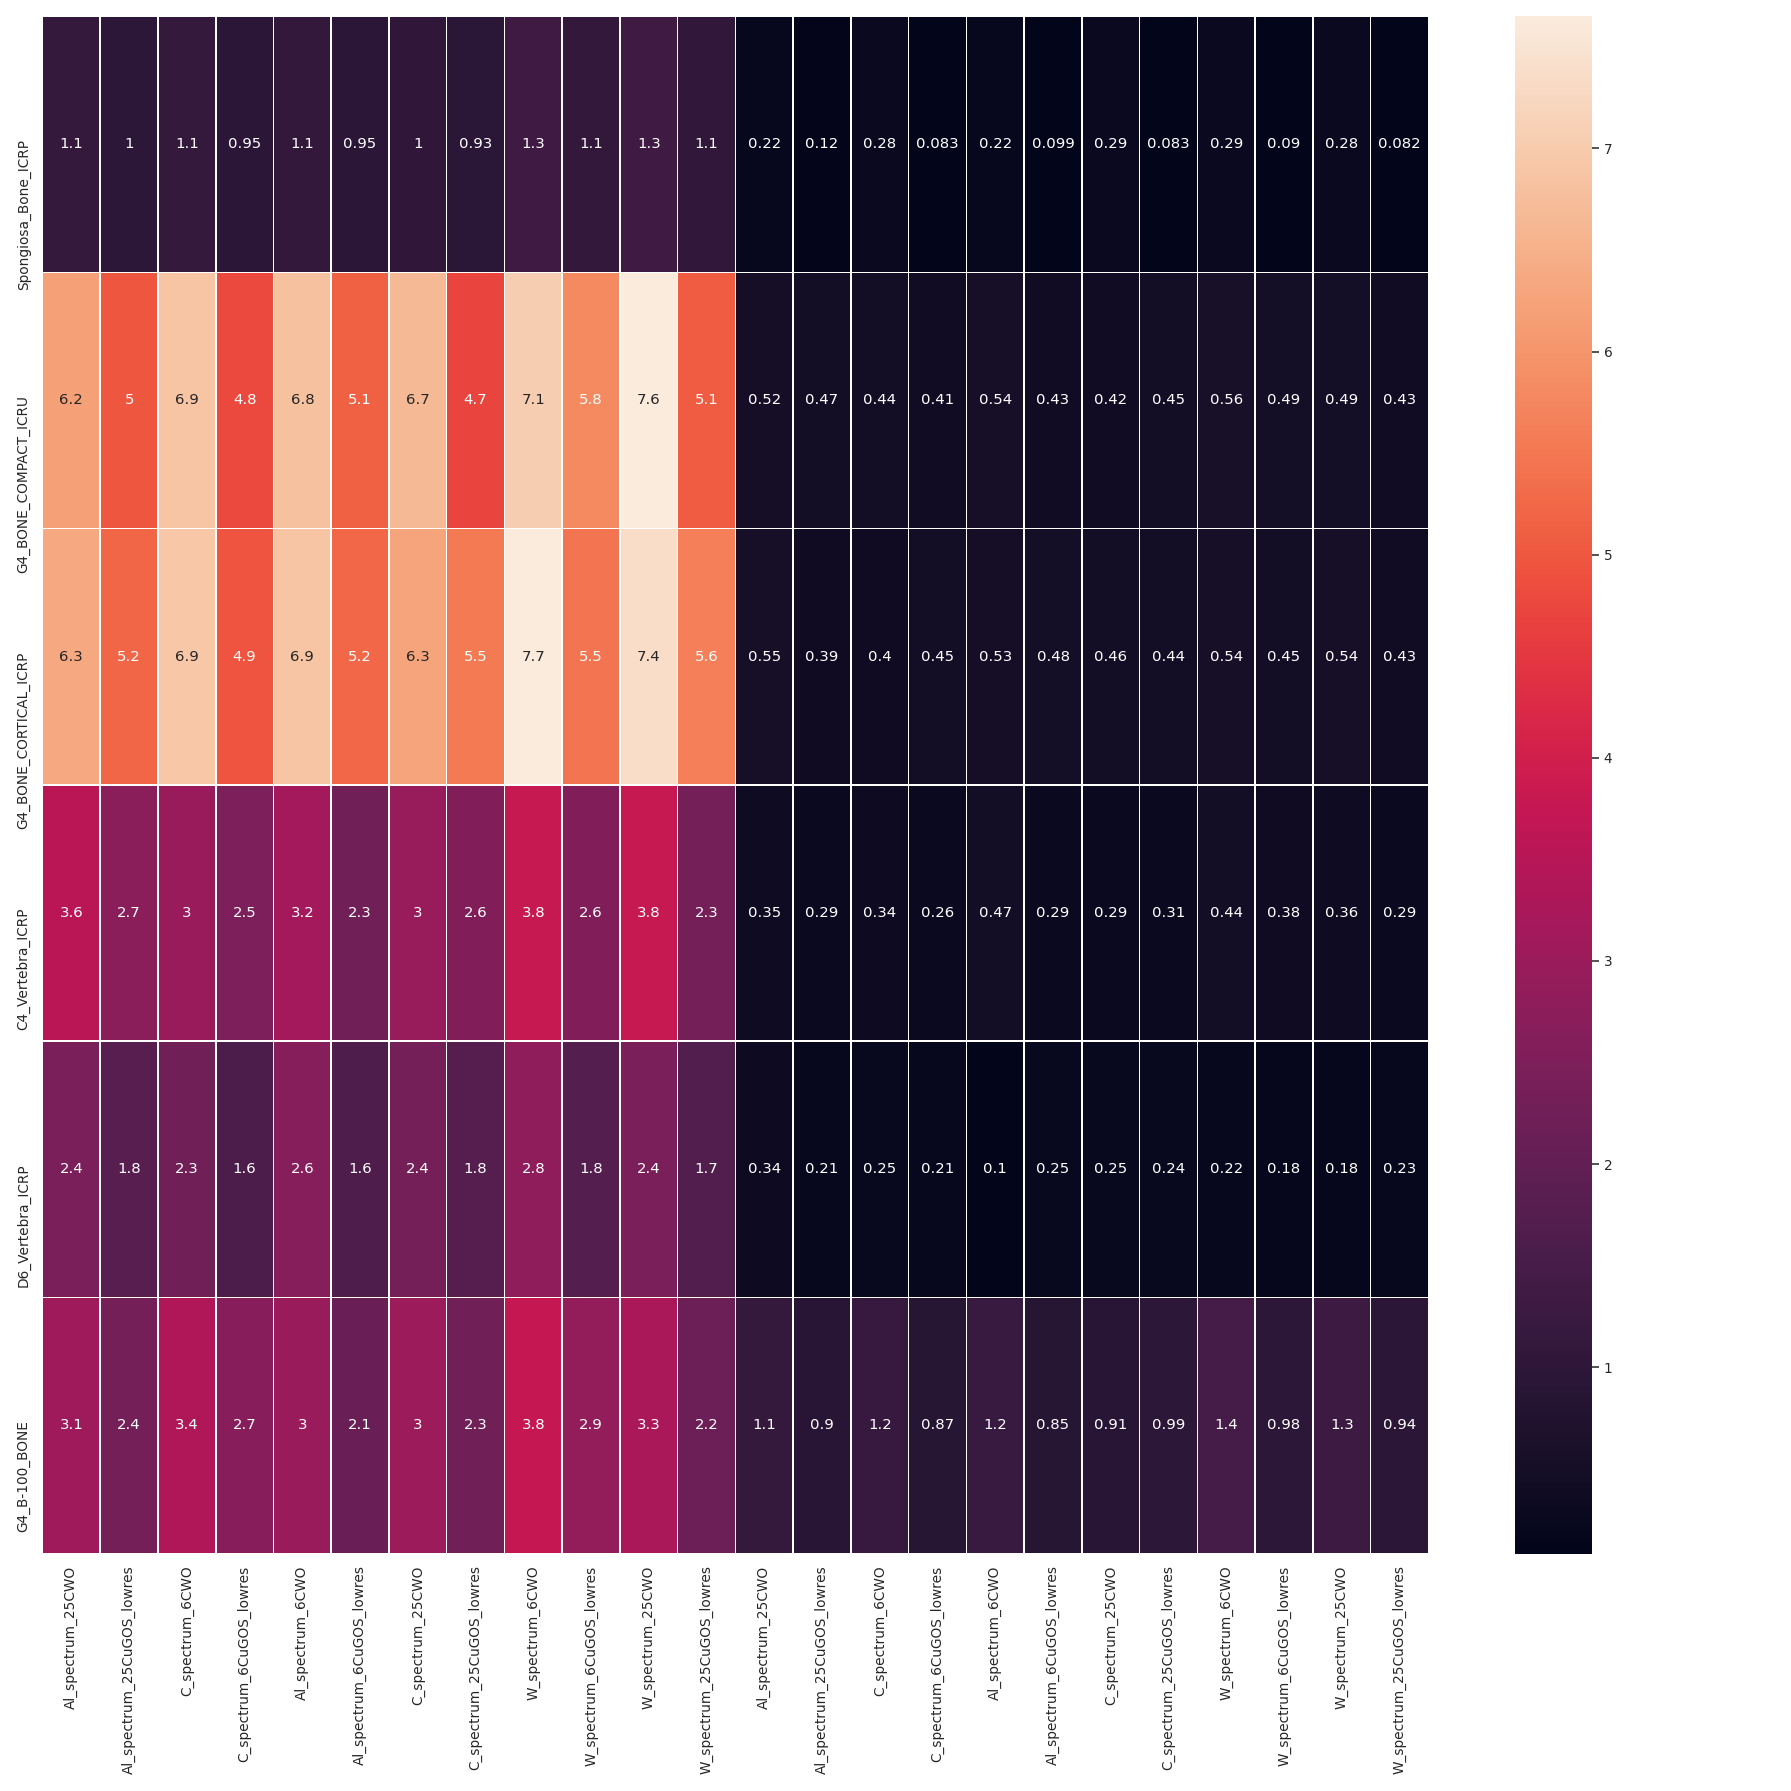

In [31]:
# def plot_cnr(res):

dat = []
index = []
column = []
    
for words, cnrs in res:
    
#     print(cnrs[-1])
#     cnrs[-1][np.isfinite(cnrs[-1])] = 0
    dat.append(np.nansum(cnrs[-1][0]))
    dat.append(np.nansum(cnrs[-1][9]))
    dat.append(np.nansum(cnrs[-1][18]))
    dat.append(np.nansum(cnrs[-1][27]))
    dat.append(np.nansum(cnrs[-1][31]))
    dat.append(np.nansum(cnrs[-1][35]))
    
    index.append(words[1] + ' ' + words[2])
    column.append(words[2])
    
all_plot = pd.DataFrame(data= np.array(dat).reshape([6,len(dat)//6],order='F'),index=phan_map_hard[2:],columns=index)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(all_plot, annot=True, linewidths=.5, ax=ax)
plt.tight_layout()

<IPython.core.display.Javascript object>


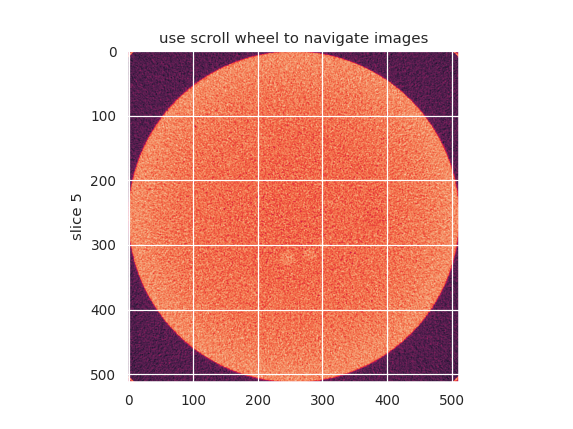

In [26]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = np.array(img_xg.T)

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [15]:
for ii in range(1,361):
    
    print(ii,end=' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 